# Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
from scipy.stats import norm

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["264653","2a9d8f","e76f51","e9c46a"]) 
# https://coolors.co/palettes/popular
plt.rcParams.update({'font.size': 20})

In [4]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

## Pictures Histogramms taft

In [5]:
sigma_hist = 0.12 #ns
mu_hist = 5.010 #ns

data = norm.rvs(mu_hist, sigma_hist, size=300000)

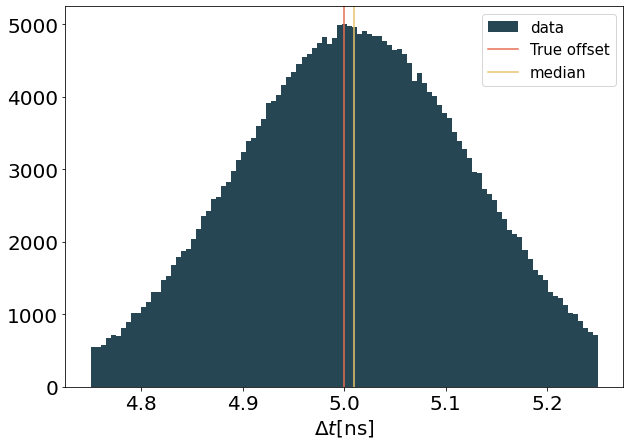

In [10]:
fig = plt.figure(figsize=(10, 7))
plt.hist(data, bins=101, label="data", range=(4.75,5.25))
plt.axvline(x=5, color="#e76f51", label="True offset")#, ymin=0.1, ymax=0.9)
plt.axvline(x=5.010, color="#e9c46a", label="median")#, ymin=0.1, ymax=0.9)

plt.legend(fontsize=15)
plt.xlabel("$\Delta t$[ns]")
plt.show()

In [7]:
data_o = norm.rvs(5+0.01, sigma_hist, size=200000)
data_beamline = norm.rvs(5-0.01, sigma_hist, size=100000)

In [8]:
x = np.linspace(4.5,5.5,100)

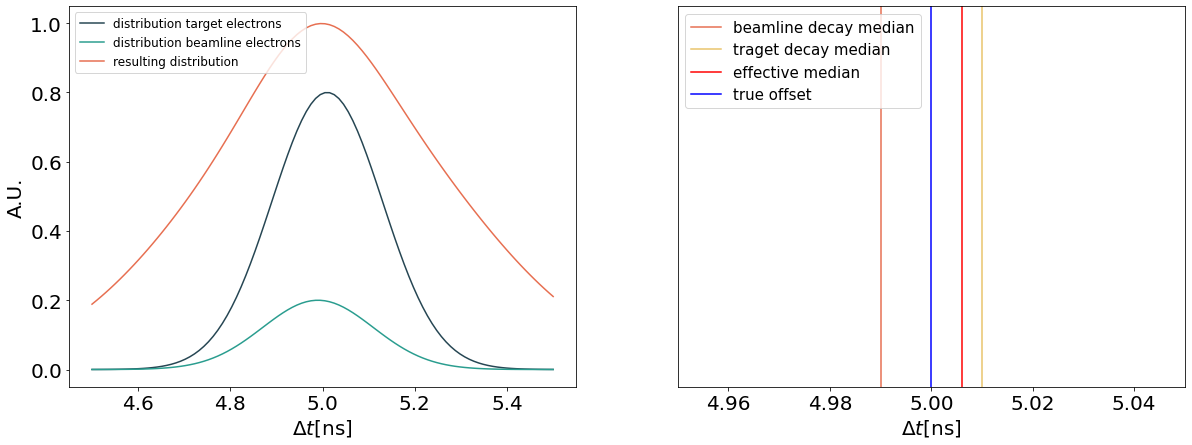

In [9]:
fig, ax_arr = plt.subplots(1, 2, figsize=(20, 7))


ax_arr[0].plot(x, 0.8*gaussian(x,5+0.01,0.12), label="distribution target electrons")
ax_arr[0].plot(x, 0.2*gaussian(x,5-0.01,0.12), label="distribution beamline electrons")
ax_arr[0].plot(x, 0.2*gaussian(x,5-0.01,0.12)+0.8*gaussian(x,5+0.01,0.3), label="resulting distribution")
ax_arr[0].legend(fontsize=12,loc=2)
ax_arr[0].set_xlabel("$\Delta t$[ns]")
ax_arr[0].set_ylabel("A.U.")


ax_arr[1].set_xlim([4.95, 5.05])
ax_arr[1].axvline(x=5-0.01, color="#e76f51", label="beamline decay median")#, ymin=0.1, ymax=0.9)
ax_arr[1].axvline(x=5+0.01, color="#e9c46a", label="traget decay median")#, ymin=0.1, ymax=0.9)
ax_arr[1].axvline(x=5+0.006, color="red", label="effective median")#, ymin=0.1, ymax=0.9)
ax_arr[1].axvline(x=5, color="blue", label="true offset")#, ymin=0.1, ymax=0.9)
ax_arr[1].legend(fontsize=15,loc=2)
ax_arr[1].set_xlabel("$\Delta t$[ns]")
ax_arr[1].set_yticks([])


plt.show()

In [7]:
weights= [0.5254887989298086,
          0.26924871966376823,
          0.09718731593606804,
          0.046994641555770746,
          0.025734321496670626,
          0.014479903962303706,
          0.008259790953288942,
          0.004812491888708083,
          0.0028835642763729297,
          0.0017517270812327167,
          0.0010881610078966547,
          0.000701626750791163,
          0.0004660873124419731,
          0.00031634038474977286]

weights = np.asarray(weights)*100

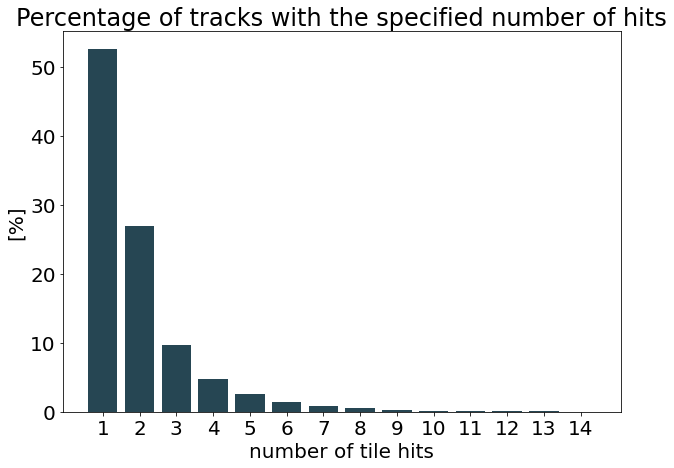

In [13]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(10, 7))

plt.bar(range(1,15),weights)
#plt.yticks(np.arange(0, 60, step=25), ['0%','25%', '50%', '75%', '100%'])  # Set label locations.
plt.xticks(np.arange(1,15, step = 1))
plt.xlabel("number of tile hits")
plt.ylabel("[%]")
plt.title("Percentage of tracks with the specified number of hits")
plt.show()

In [15]:
np.average(range(1,15)[1:],weights=weights[1:])

2.9630319355522468

In [14]:
np.average(range(1,15),weights=weights)

1.930875272512056